In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [32]:
candidates = ['Black', 'White', 'Edge']

In [4]:
f = open('./results/timestamp.log')
timestamp = []
for ts in f:
    timestamp.append(ts.strip())
    
timestamp

['1553411065829', '1553421683232', '1553428436895']

In [8]:
confusions = {
    'Black': [],
    'White': [],
    'Edge': [],
}
for ts in timestamp:
    conf_black = pd.read_csv('./results/confusion_black_{}.csv'.format(ts), index_col=0)
    conf_white = pd.read_csv('./results/confusion_white_{}.csv'.format(ts), index_col=0)
    conf_edge = pd.read_csv('./results/confusion_edge_{}.csv'.format(ts), index_col=0)
    
    confusions['Black'].append(conf_black)
    confusions['White'].append(conf_white)
    confusions['Edge'].append(conf_edge)

confusions['Black'][0]

,false_positive,false_negative,true_positive,true_negative,true_result,total
amount,48.000000,73.000000,578.000000,180.000000,758.000000,879.0
percent_group,0.210526,0.112135,0.887865,0.789474,0.862344,1.0


In [12]:
histories = {
    'Black': [],
    'White': [],
    'Edge': [],
}
for ts in timestamp:
    hist_black = pd.read_csv('./results/history_black_{}.csv'.format(ts), index_col=0)
    hist_white = pd.read_csv('./results/history_white_{}.csv'.format(ts), index_col=0)
    hist_edge = pd.read_csv('./results/history_edge_{}.csv'.format(ts), index_col=0)
    
    histories['Black'].append(hist_black)
    histories['White'].append(hist_white)
    histories['Edge'].append(hist_edge)

histories['Black'][0]

,val_loss,val_acc,loss,acc
0,0.395122,0.857143,0.433730,0.823171
1,0.294221,0.851429,0.372547,0.862195
2,0.348049,0.868571,0.344864,0.840049
3,0.272918,0.891429,0.349541,0.873171
4,0.240542,0.885714,0.293084,0.902439
5,0.449184,0.890173,0.221081,0.930488
6,0.234431,0.920000,0.321411,0.899878
7,0.302691,0.920000,0.228389,0.926829
8,0.297862,0.920000,0.261671,0.923171
9,2.770189,0.731429,0.204554,0.937805


In [40]:
confusions_amt = dict()
for can in candidates:
    conf_amt_arr = []
    for conf in confusions[can] :
        conf_amt_arr.append(conf.loc['amount'])
    conf_amt = pd.concat(conf_amt_arr, axis=1)
    conf_amt.columns = ['1', '2', '3']
    conf_amt = conf_amt.transpose()
    confusions_amt[can] = conf_amt

1     73.0
2     27.0
3    123.0
Name: false_negative, dtype: float64

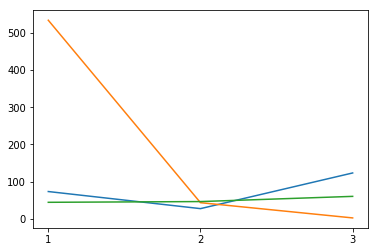

In [47]:
plt.plot(confusions_amt['Black'].false_negative)
plt.plot(confusions_amt['White'].false_negative)
plt.plot(confusions_amt['Edge'].false_negative)
confusions_amt['Black'].false_negative
# confusions_amt['White'].false_negative
# confusions_amt['Edge'].false_negative